In [94]:
import datetime
import numpy as np
import pandas as pd
from datetime import date
import plotly.express as px
from nsepy import get_history
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [95]:
stock_name = input('Enter NSE Stock Name: ').upper()
date_entry = input('Enter a date in yyyy,m,d format')
year, month, day = map(int, date_entry.split(','))
start_date= datetime.date(year, month, day)
end_date = date.today()
# get_history(symbol = 'SBIN', start=date(2015,1,1), end=date(2022,3,1))
def stock_df(s, sd, ed):
    df = get_history(symbol=s, start=sd, end=ed)
    return df

In [96]:
df = stock_df(stock_name, start_date, end_date)
df.reset_index(inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,BAJAJFINSV,EQ,1307.65,1309.90,1322.30,1280.0,1289.95,1286.60,1292.54,29392,3.799047e+12,1435,14391,0.4896
1,2015-01-02,BAJAJFINSV,EQ,1286.60,1291.70,1298.00,1267.0,1273.95,1275.65,1282.17,43560,5.585126e+12,2002,30295,0.6955
2,2015-01-05,BAJAJFINSV,EQ,1275.65,1268.05,1284.00,1252.6,1258.95,1258.70,1272.41,31566,4.016505e+12,1952,21441,0.6792
3,2015-01-06,BAJAJFINSV,EQ,1258.70,1250.00,1253.15,1215.6,1240.00,1229.60,1235.26,37724,4.659880e+12,3629,22464,0.5955
4,2015-01-07,BAJAJFINSV,EQ,1229.60,1230.25,1240.85,1208.2,1230.00,1228.55,1228.49,73114,8.982017e+12,9571,48718,0.6663


In [97]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.head()

,Open,High,Low,Close,Volume
0,1309.90,1322.30,1280.0,1286.60,29392
1,1291.70,1298.00,1267.0,1275.65,43560
2,1268.05,1284.00,1252.6,1258.70,31566
3,1250.00,1253.15,1215.6,1229.60,37724
4,1230.25,1240.85,1208.2,1228.55,73114


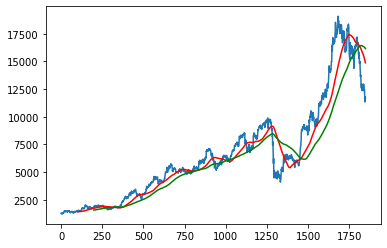

In [98]:
plt.plot(df.Close)
plt.plot(df.Close.rolling(100).mean(), color='red')
plt.plot(df.Close.rolling(200).mean(), color='green')

In [99]:
train_df = pd.DataFrame(df.Close[0:int(len(df.Close)*0.75)])
test_df = pd.DataFrame(df.Close[int(len(df.Close)*0.75):int(len(df))])
train_df.shape, test_df.shape

((1386, 1), (462, 1))

In [100]:
train_df.head()

,Close
0,1286.60
1,1275.65
2,1258.70
3,1229.60
4,1228.55


In [101]:
test_df.head()

,Close
1386,6440.35
1387,6357.20
1388,6350.00
1389,6246.70
1390,6269.10


In [102]:
scaler = minmax_scaler = MinMaxScaler(feature_range=(0, 1))
train_df_scaled = scaler.fit_transform(train_df)
test_df_scaled = scaler.fit_transform(test_df)

In [103]:
train_df_scaled

array([[0.00669882],
       [0.00543522],
       [0.00347923],
       ...,
       [0.58473637],
       [0.60452127],
       [0.59709545]])

In [104]:
X_train = []
y_train = []
for i in range(100, len(train_df_scaled)):
    X_train.append(train_df_scaled[i-100 : i])
    y_train.append(train_df_scaled[i, 0])

X_train

[array([[0.00669882],
        [0.00543522],
        [0.00347923],
        [0.00012117],
        [0.        ],
        [0.0070681 ],
        [0.00584488],
        [0.00451781],
        [0.00668151],
        [0.00295995],
        [0.00698155],
        [0.00451204],
        [0.00339269],
        [0.01077813],
        [0.00739698],
        [0.00803743],
        [0.009653  ],
        [0.01694612],
        [0.02560093],
        [0.0267376 ],
        [0.02527205],
        [0.03239784],
        [0.02768386],
        [0.02801851],
        [0.02857819],
        [0.02774733],
        [0.02550284],
        [0.02399691],
        [0.02097349],
        [0.03121502],
        [0.03257671],
        [0.02942059],
        [0.02948983],
        [0.02754538],
        [0.02801851],
        [0.02389882],
        [0.02322951],
        [0.02339107],
        [0.01974451],
        [0.02234095],
        [0.02063884],
        [0.02571633],
        [0.02959946],
        [0.0278858 ],
        [0.03468271],
        [0

In [105]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(1286, 100, 1)

In [106]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, 
                input_shape=(X_train.shape[1], 1))) # input_shape=(timesteps, features)
model.add(Dropout(0.2))
#layer 2
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
#layer 3
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.4))
#layer 4
model.add(LSTM(units=60, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units = 1))


In [107]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 128)          66560     
                                                                 
 dropout_12 (Dropout)        (None, 100, 128)          0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 100)          91600     
                                                                 
 dropout_13 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 60)           38640     
                                                                 
 dropout_14 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_15 (LSTM)              (None, 60)               

In [108]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=69)

Epoch 1/50
19/19 [==============================] - 12s 386ms/step - loss: 0.0571
Epoch 2/50
19/19 [==============================] - 7s 387ms/step - loss: 0.0135
Epoch 3/50
19/19 [==============================] - 7s 378ms/step - loss: 0.0102
Epoch 4/50
19/19 [==============================] - 8s 411ms/step - loss: 0.0095
Epoch 5/50
19/19 [==============================] - 8s 407ms/step - loss: 0.0095
Epoch 6/50
19/19 [==============================] - 8s 412ms/step - loss: 0.0092
Epoch 7/50
19/19 [==============================] - 8s 415ms/step - loss: 0.0082
Epoch 8/50
19/19 [==============================] - 8s 413ms/step - loss: 0.0074
Epoch 9/50
19/19 [==============================] - 8s 413ms/step - loss: 0.0083
Epoch 10/50
19/19 [==============================] - 8s 417ms/step - loss: 0.0080
Epoch 11/50
19/19 [==============================] - 8s 413ms/step - loss: 0.0066
Epoch 12/50
19/19 [==============================] - 8s 445ms/step - loss: 0.0082
Epoch 13/50
19/19 [=====

In [109]:
train_df.tail(100)

,Close
1286,7495.60
1287,7017.50
1288,6310.20
1289,5785.50
1290,6233.05
...,...
1381,6162.00
1382,6242.05
1383,6295.70
1384,6467.15


In [110]:
past_100 = train_df.tail(100)

In [111]:
final_df = past_100.append(test_df, ignore_index=True)
final_df.head()

C:\Users\chinn\AppData\Local\Temp\ipykernel_19188\2591333897.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100.append(test_df, ignore_index=True)


,Close
0,7495.60
1,7017.50
2,6310.20
3,5785.50
4,6233.05


In [112]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.22686975],
       [0.19495237],
       [0.14773387],
       [0.11270553],
       [0.14258343],
       [0.03496826],
       [0.0267369 ],
       [0.04893753],
       [0.07009673],
       [0.05296309],
       [0.03764528],
       [0.03297551],
       [0.02701395],
       [0.02760476],
       [0.04190116],
       [0.03413043],
       [0.04826661],
       [0.02631298],
       [0.0335029 ],
       [0.04021216],
       [0.06024647],
       [0.05240565],
       [0.03323253],
       [0.04529584],
       [0.04221492],
       [0.01953029],
       [0.03473126],
       [0.05104044],
       [0.06017638],
       [0.06723278],
       [0.04440127],
       [0.03551234],
       [0.03976488],
       [0.03846308],
       [0.03362974],
       [0.03075911],
       [0.03811593],
       [0.04800959],
       [0.04626384],
       [0.041791  ],
       [0.02458059],
       [0.0292537 ],
       [0.04037572],
       [0.02950405],
       [0.01457344],
       [0.        ],
       [0.01073481],
       [0.012

In [113]:
input_data.shape

(562, 1)

In [114]:
X_test = []
y_test = []
for i in range(100, len(input_data)):
    X_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [115]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((462, 100, 1), (462,))

In [116]:
y_pred = model.predict(X_test)

In [117]:
scaler.scale_

array([6.67587938e-05])

In [118]:
scale_factor = 1/0.00256608
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

In [119]:
y_pred.shape, y_test.shape

((462, 1), (462,))

In [120]:
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
rmse

24.38322287858074

Text(0, 0.5, 'Price')

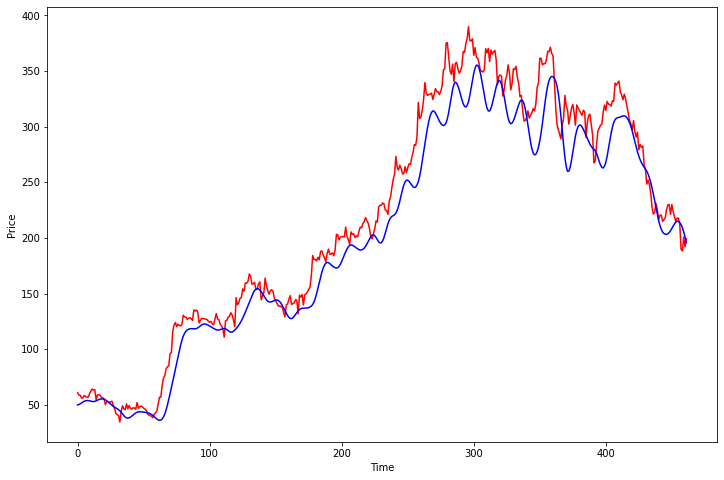

In [121]:
plt.figure(figsize=(12,8))
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_pred, color='blue', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')